# Titanic Survival Prediction

## 1. Import Libraries and Load Data

First, let's import the necessary libraries and load our training and testing datasets.

In [1]:
# Import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Exploratory Data Analysis (EDA)

Now, let's explore the data to understand its structure, find patterns, and identify missing values.

== Dataset info ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

== Descriptive statistics (incl. categoricals) ==


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



== Missing values (%): ==
Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64


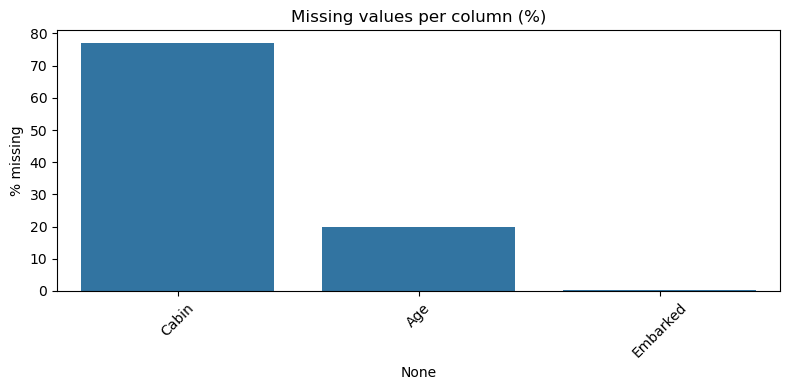

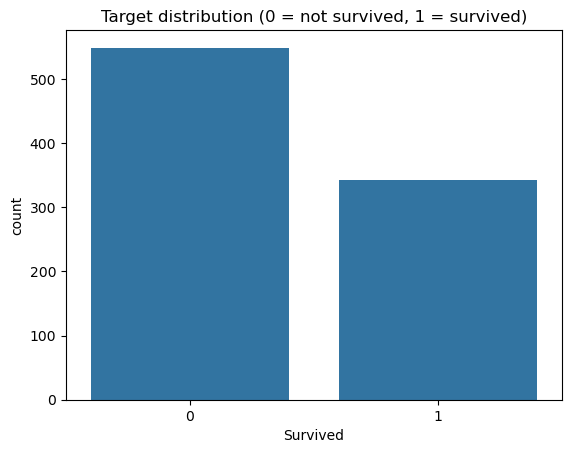


Survival rate (%):
Survived
0    61.62
1    38.38
Name: proportion, dtype: float64


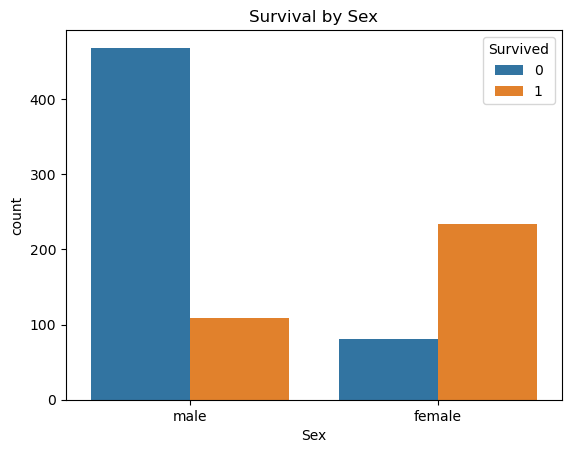


Survival rate by Sex (%):
Sex
female    74.20
male      18.89
Name: Survived, dtype: float64


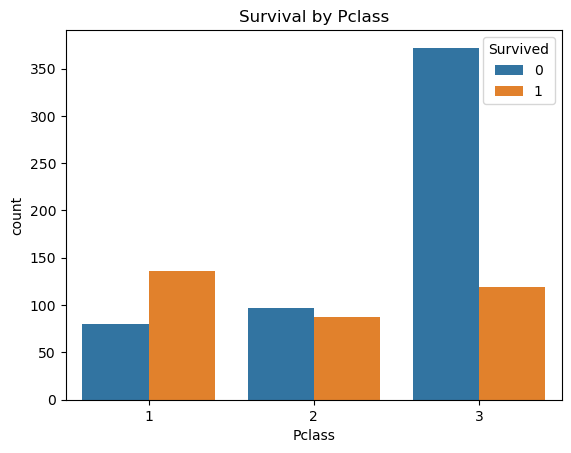


Survival rate by Pclass (%):
Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


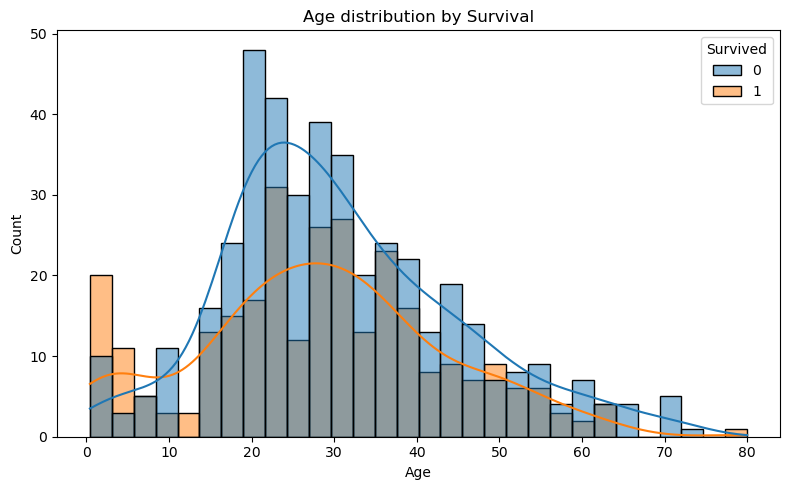


Age summary:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


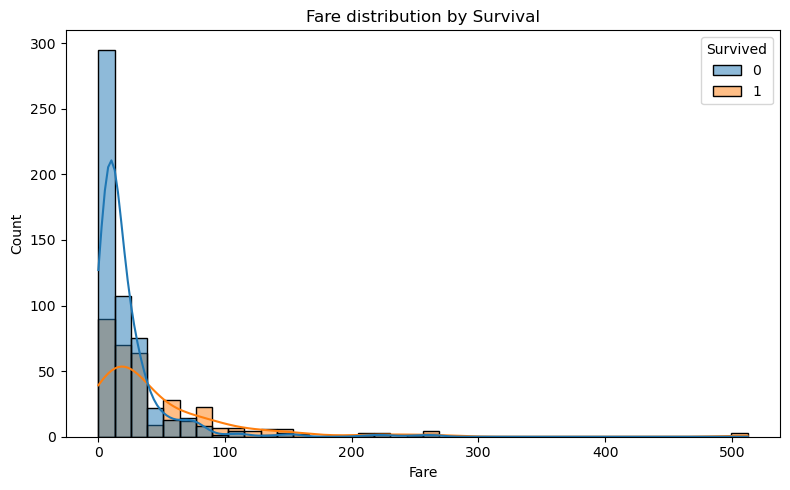

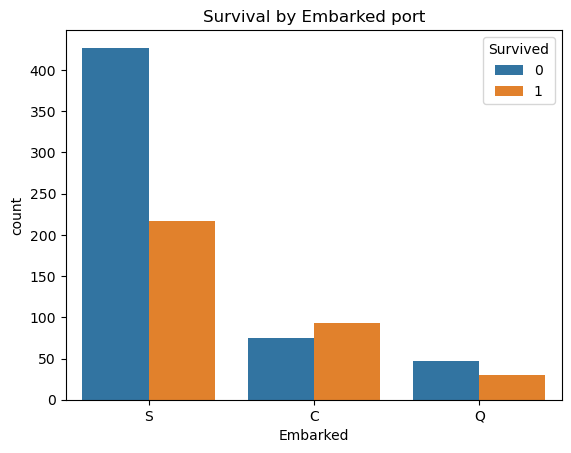


Survival rate by Embarked (%):
Embarked
C    55.36
Q    38.96
S    33.70
Name: Survived, dtype: float64


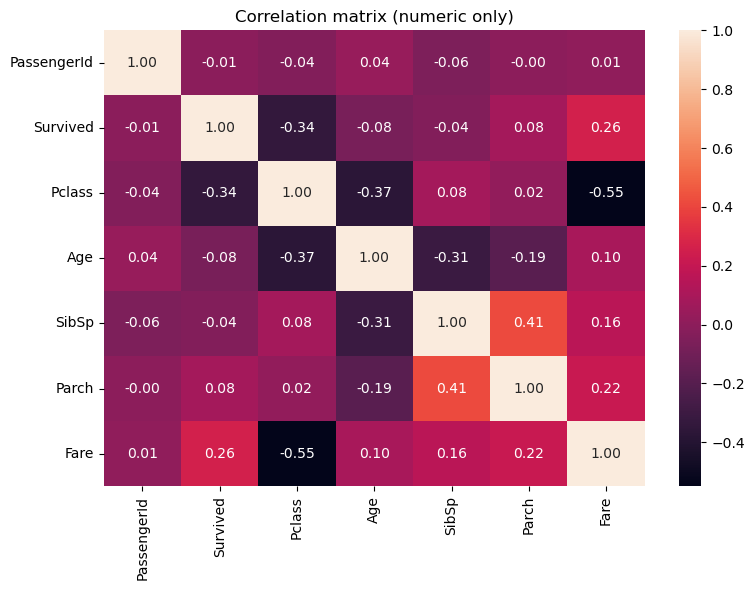

In [5]:
# Your EDA code here. 
# Examples: 
# - train_df.info()
# - train_df.describe()
# - sns.countplot(x='Survived', data=train_df)
# - sns.catplot(x='Sex', col='Survived', kind='count', data=train_df)

# ============================================================
# 2) Exploratory Data Analysis (EDA)
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Quick overview
print("== Dataset info ==")
print(train_df.info())

print("\n== Descriptive statistics (incl. categoricals) ==")
display(train_df.describe(include="all"))

# ------------------------------------------------------------
# 1) Missing values
# ------------------------------------------------------------
missing = (train_df.isnull().mean() * 100).sort_values(ascending=False)
missing = missing[missing > 0]
print("\n== Missing values (%): ==")
print(missing)

plt.figure(figsize=(8,4))
sns.barplot(x=missing.index, y=missing.values)
plt.title("Missing values per column (%)")
plt.ylabel("% missing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 2) Target distribution
# ------------------------------------------------------------
sns.countplot(x="Survived", data=train_df)
plt.title("Target distribution (0 = not survived, 1 = survived)")
plt.show()

print("\nSurvival rate (%):")
print((train_df["Survived"].value_counts(normalize=True) * 100).round(2))

# ------------------------------------------------------------
# 3) Survival by Sex
# ------------------------------------------------------------
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Survival by Sex")
plt.show()

print("\nSurvival rate by Sex (%):")
print((train_df.groupby("Sex")["Survived"].mean() * 100).round(2))

# ------------------------------------------------------------
# 4) Survival by Passenger Class (Pclass)
# ------------------------------------------------------------
sns.countplot(x="Pclass", hue="Survived", data=train_df)
plt.title("Survival by Pclass")
plt.show()

print("\nSurvival rate by Pclass (%):")
print((train_df.groupby("Pclass")["Survived"].mean() * 100).round(2))

# ------------------------------------------------------------
# 5) Age distribution (by Survival)
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(data=train_df, x="Age", bins=30, kde=True, hue="Survived")
plt.title("Age distribution by Survival")
plt.tight_layout()
plt.show()

print("\nAge summary:")
print(train_df["Age"].describe())

# ------------------------------------------------------------
# 6) Fare distribution (by Survival)
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(data=train_df, x="Fare", bins=40, kde=True, hue="Survived")
plt.title("Fare distribution by Survival")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 7) Survival by Embarked
# ------------------------------------------------------------
sns.countplot(x="Embarked", hue="Survived", data=train_df)
plt.title("Survival by Embarked port")
plt.show()

print("\nSurvival rate by Embarked (%):")
print((train_df.groupby("Embarked")["Survived"].mean() * 100).round(2))

# ------------------------------------------------------------
# 8) Correlation heatmap (numeric features)
# ------------------------------------------------------------
plt.figure(figsize=(8,6))
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation matrix (numeric only)")
plt.tight_layout()
plt.show()


## 3. Data Cleaning & Feature Engineering

Based on our EDA, we'll clean the data by handling missing values and create new features to improve our model's performance.

In [7]:
# Your data cleaning and feature engineering code here.
# Examples:
# - Handle missing 'Age' values
# - Convert 'Sex' to numerical values
# - Create a 'FamilySize' feature

# ============================================================
# 3) Data Cleaning & Feature Engineering
# ============================================================

import numpy as np
import pandas as pd

# Keep target and ids
TARGET = "Survived"
ID_COL = "PassengerId"

train = train_df.copy()
test  = test_df.copy()

y_train = train[TARGET].astype(int)
train.drop(columns=[TARGET], inplace=True)

# ------------------------------------------------------------
# Helper: extract Title from the Name field
# ------------------------------------------------------------
def extract_title(name: str) -> str:
    if pd.isna(name): 
        return "Unknown"
    try:
        after_comma = name.split(",")[1]
        title = after_comma.split(".")[0].strip()
        return title
    except Exception:
        return "Unknown"

# ------------------------------------------------------------
# Concatenate for consistent transformations
# ------------------------------------------------------------
train["is_train"] = 1
test["is_train"]  = 0
full = pd.concat([train, test], axis=0, ignore_index=True)

# ------------------------------------------------------------
# Feature engineering
# ------------------------------------------------------------
# 1) Title (normalized)
full["Title"] = full["Name"].apply(extract_title)
rare = {"Lady","Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"}
full["Title"] = full["Title"].replace({"Mlle":"Miss","Ms":"Miss","Mme":"Mrs"})
full["Title"] = full["Title"].apply(lambda t: "Rare" if t in rare else t)

# 2) FamilySize & IsAlone
full["FamilySize"] = full["SibSp"].fillna(0) + full["Parch"].fillna(0) + 1
full["IsAlone"] = (full["FamilySize"] == 1).astype(int)

# 3) CabinLetter (first letter; 'Unknown' when NaN)
full["CabinLetter"] = full["Cabin"].astype(str).str[0]
full["CabinLetter"] = full["CabinLetter"].replace({"n":"Unknown"})

# 4) TicketGroupSize (how many share the same ticket)
ticket_counts = full["Ticket"].value_counts()
full["TicketGroupSize"] = full["Ticket"].map(ticket_counts)

# ------------------------------------------------------------
# Missing values handling
# ------------------------------------------------------------
# Embarked → most frequent
full["Embarked"] = full["Embarked"].fillna(full["Embarked"].mode()[0])

# Fare → median by (Pclass, Embarked)
full["Fare"] = full.groupby(["Pclass","Embarked"])["Fare"].transform(
    lambda s: s.fillna(s.median())
)

# Age → median by (Title, Sex, Pclass)
age_group_median = full.groupby(["Title","Sex","Pclass"])["Age"].transform("median")
full["Age"] = full["Age"].fillna(age_group_median)
# In case any Age still missing (rare), fall back to global median
full["Age"] = full["Age"].fillna(full["Age"].median())

# ------------------------------------------------------------
# Final feature selection
# (keep only useful columns before encoding)
# ------------------------------------------------------------
features = [
    "Pclass", "Sex", "Age", "Fare", "Embarked",
    "FamilySize", "IsAlone", "Title", "CabinLetter", "TicketGroupSize",
    "SibSp", "Parch"
]
X_full = full[features].copy()

# ------------------------------------------------------------
# Encoding categoricals with one-hot (drop_first=False to keep full info)
# ------------------------------------------------------------
X_full_enc = pd.get_dummies(
    X_full,
    columns=["Sex","Embarked","Title","CabinLetter"],
    drop_first=False
)

# ------------------------------------------------------------
# Split back to train/test with aligned columns
# ------------------------------------------------------------
X_train = X_full_enc[full["is_train"] == 1].reset_index(drop=True)
X_test  = X_full_enc[full["is_train"] == 0].reset_index(drop=True)

# (Optionally reset y_train index to match)
y_train = y_train.reset_index(drop=True)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
X_train.head()


X_train shape: (891, 28)
X_test shape: (418, 28)


,Pclass,Age,Fare,FamilySize,IsAlone,TicketGroupSize,SibSp,Parch,Sex_female,Sex_male,...,Title_the Countess,CabinLetter_A,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_Unknown
0,3,22.0,7.2500,2,0,1,1,0,False,True,...,False,False,False,False,False,False,False,False,False,True
1,1,38.0,71.2833,2,0,2,1,0,True,False,...,False,False,False,True,False,False,False,False,False,False
2,3,26.0,7.9250,1,1,1,0,0,True,False,...,False,False,False,False,False,False,False,False,False,True
3,1,35.0,53.1000,2,0,2,1,0,True,False,...,False,False,False,True,False,False,False,False,False,False
4,3,35.0,8.0500,1,1,1,0,0,False,True,...,False,False,False,False,False,False,False,False,False,True


## 4. Model Training and Evaluation

It's time to choose a model, train it on our processed data, and see how well it performs.

In [8]:
# Your model training code here.
# Examples:
# - from sklearn.model_selection import train_test_split
# - from sklearn.linear_model import LogisticRegression
# - Define features (X) and target (y)
# - Split data, train model, check accuracy

# ============================================================
# 4) Model Training and Evaluation
# ============================================================

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

RANDOM_STATE = 42

# ------------------------------------------------------------
# 4.1 Train/Validation split
# ------------------------------------------------------------
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=RANDOM_STATE, stratify=y_train
)

print("Train shape:", X_tr.shape, " | Val shape:", X_val.shape)

# ------------------------------------------------------------
# 4.2 Baseline models
# ------------------------------------------------------------

# A) Logistic Regression
logreg = LogisticRegression(max_iter=1000, n_jobs=None, random_state=RANDOM_STATE)
logreg.fit(X_tr, y_tr)
pred_lr = logreg.predict(X_val)
acc_lr = accuracy_score(y_val, pred_lr)
print(f"[LogReg] Val accuracy: {acc_lr:.4f}")

# B) Random Forest
rf = RandomForestClassifier(
    n_estimators=300, random_state=RANDOM_STATE, n_jobs=-1
)
rf.fit(X_tr, y_tr)
pred_rf = rf.predict(X_val)
acc_rf = accuracy_score(y_val, pred_rf)
print(f"[RandomForest] Val accuracy: {acc_rf:.4f}")

# Optional: quick classification report for the better baseline
better_name = "RandomForest" if acc_rf >= acc_lr else "LogReg"
better_pred = pred_rf if acc_rf >= acc_lr else pred_lr
print(f"\nClassification report ({better_name}):")
print(classification_report(y_val, better_pred, digits=3))

# ------------------------------------------------------------
# 4.3 Cross-validation (more reliable estimate)
# ------------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

def cv_score(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)
    return scores.mean(), scores.std()

lr_cv_mean, lr_cv_std = cv_score(LogisticRegression(max_iter=1000, random_state=RANDOM_STATE), X_train, y_train, cv)
rf_cv_mean, rf_cv_std = cv_score(RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE, n_jobs=-1), X_train, y_train, cv)

print(f"\n[CV] LogReg:  mean={lr_cv_mean:.4f} ± {lr_cv_std:.4f}")
print(f"[CV] RF:      mean={rf_cv_mean:.4f} ± {rf_cv_std:.4f}")

# ------------------------------------------------------------
# 4.4 Quick hyperparameter tuning (RandomForest)
#      (Keep small grids to stay fast during the hackathon)
# ------------------------------------------------------------
param_grid = {
    "n_estimators": [300, 500],
    "max_depth": [None, 6, 10],
    "min_samples_split": [2, 5, 10],
}
rf_base = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)

gs = GridSearchCV(
    rf_base, param_grid=param_grid,
    scoring="accuracy", cv=cv, n_jobs=-1, verbose=0
)
gs.fit(X_train, y_train)

print("\n[GridSearch] best params:", gs.best_params_)
print("[GridSearch] best CV score:", f"{gs.best_score_:.4f}")

best_model = gs.best_estimator_

# ------------------------------------------------------------
# 4.5 Final check on validation split with tuned model
# ------------------------------------------------------------
best_model.fit(X_tr, y_tr)
val_pred = best_model.predict(X_val)
val_acc = accuracy_score(y_val, val_pred)
print(f"\n[BestModel] Validation accuracy: {val_acc:.4f}")

# Optional: top feature importances (for tree models)
if hasattr(best_model, "feature_importances_"):
    fi = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("\nTop 15 feature importances:")
    display(fi.head(15))


Train shape: (712, 28)  | Val shape: (179, 28)
[LogReg] Val accuracy: 0.8547
[RandomForest] Val accuracy: 0.7989

Classification report (LogReg):
              precision    recall  f1-score   support

           0      0.868     0.900     0.884       110
           1      0.831     0.783     0.806        69

    accuracy                          0.855       179
   macro avg      0.850     0.841     0.845       179
weighted avg      0.854     0.855     0.854       179


[CV] LogReg:  mean=0.8328 ± 0.0170
[CV] RF:      mean=0.8226 ± 0.0193

[GridSearch] best params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 500}
[GridSearch] best CV score: 0.8395

[BestModel] Validation accuracy: 0.8045

Top 15 feature importances:


Title_Mr               0.134487
Fare                   0.133722
Sex_male               0.118623
Age                    0.105276
Sex_female             0.102386
Pclass                 0.072375
TicketGroupSize        0.055789
CabinLetter_Unknown    0.046262
FamilySize             0.038501
Title_Mrs              0.030841
Title_Miss             0.030832
SibSp                  0.023399
Embarked_S             0.014107
Parch                  0.013365
CabinLetter_E          0.011280
dtype: float64

## 5. Create Submission File

Finally, we'll use our trained model to make predictions on the test set and generate the submission file in the required format.

In [9]:
# Your submission generation code here.
# - Process the test_df in the same way as train_df
# - model.predict(X_test)
# - Create a submission DataFrame and save to 'submission.csv'

# ============================================================
# 5) Create Submission File
# ============================================================

# Use the best model from the previous section
# If you skipped GridSearch, you can use `rf` or `logreg` instead
final_model = best_model  # or rf / logreg if best_model not defined

# ------------------------------------------------------------
# 5.1 Train the model on the entire training data
# ------------------------------------------------------------
final_model.fit(X_train, y_train)

# ------------------------------------------------------------
# 5.2 Generate predictions for the test set
# ------------------------------------------------------------
test_predictions = final_model.predict(X_test)

# Ensure they are integers (0 or 1)
test_predictions = test_predictions.astype(int)

# ------------------------------------------------------------
# 5.3 Create submission DataFrame
# ------------------------------------------------------------
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_predictions
})

# ------------------------------------------------------------
# 5.4 Save submission file
# ------------------------------------------------------------
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv file has been created successfully!")

# Preview the first few rows
submission.head()


✅ submission.csv file has been created successfully!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
